In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
all_df=pd.read_csv('TrainDataset2023.csv', index_col=False)
all_df.drop('ID',axis=1,inplace=True)
all_df.head()
#test=pd.array([0,1,2,3,45])

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1.0,144.0,41.0,0,0.0,0.0,1.0,3.0,3.0,1.0,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0.0,142.0,39.0,1,1.0,0.0,0.0,3.0,3.0,1.0,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1.0,135.0,31.0,0,0.0,0.0,1.0,2.0,1.0,1.0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0.0,12.0,35.0,0,0.0,0.0,1.0,3.0,3.0,1.0,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0.0,109.0,61.0,1,0.0,0.0,0.0,2.0,1.0,1.0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [170]:
#data procressing
all_df=all_df.dropna()

In [171]:
all_df.describe()
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 399
Columns: 119 entries, pCR (outcome) to original_ngtdm_Strength
dtypes: float64(116), int64(3)
memory usage: 365.6 KB


In [172]:
all_df['pCR (outcome)'].value_counts()

pCR (outcome)
0.0    308
1.0     82
Name: count, dtype: int64

<AxesSubplot:xlabel='pCR (outcome)', ylabel='count'>

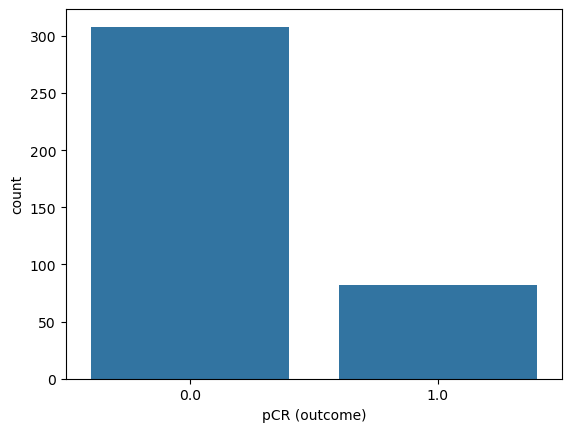

In [173]:
sns.countplot(x="pCR (outcome)", data=all_df)

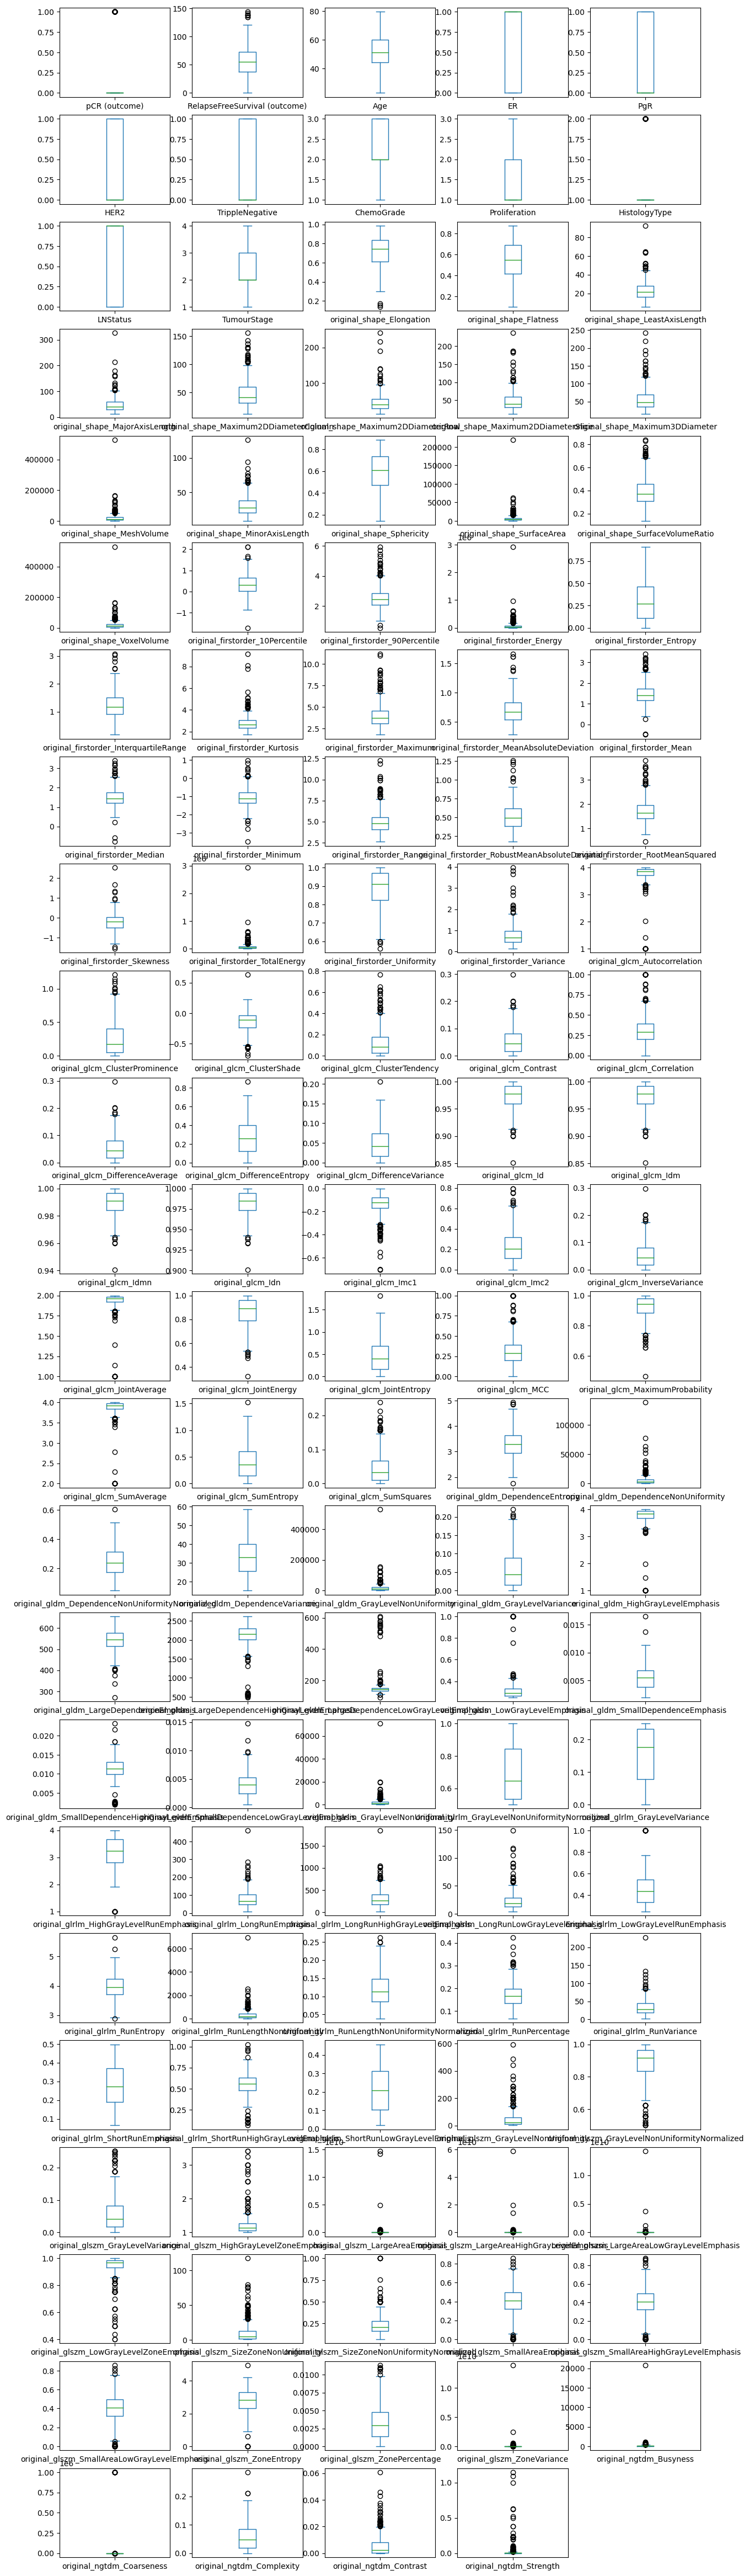

In [174]:
data_mean = all_df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(24,5), sharex=False,
sharey=False, figsize=(15,60));

<AxesSubplot:>

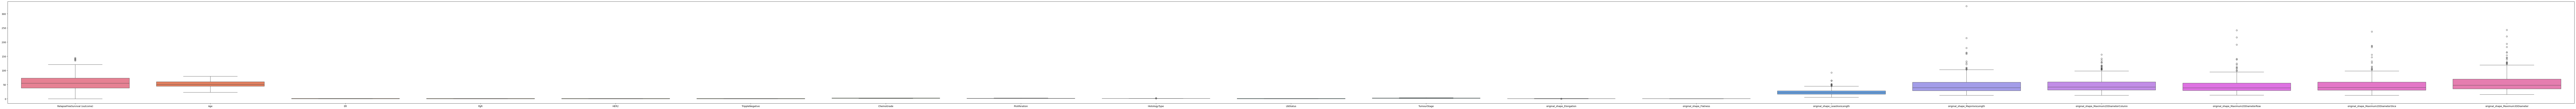

In [175]:
fig,ax=plt.subplots(1,figsize=(200,8))
sns.boxplot(data=all_df.iloc[:, 1:20],ax=ax) 

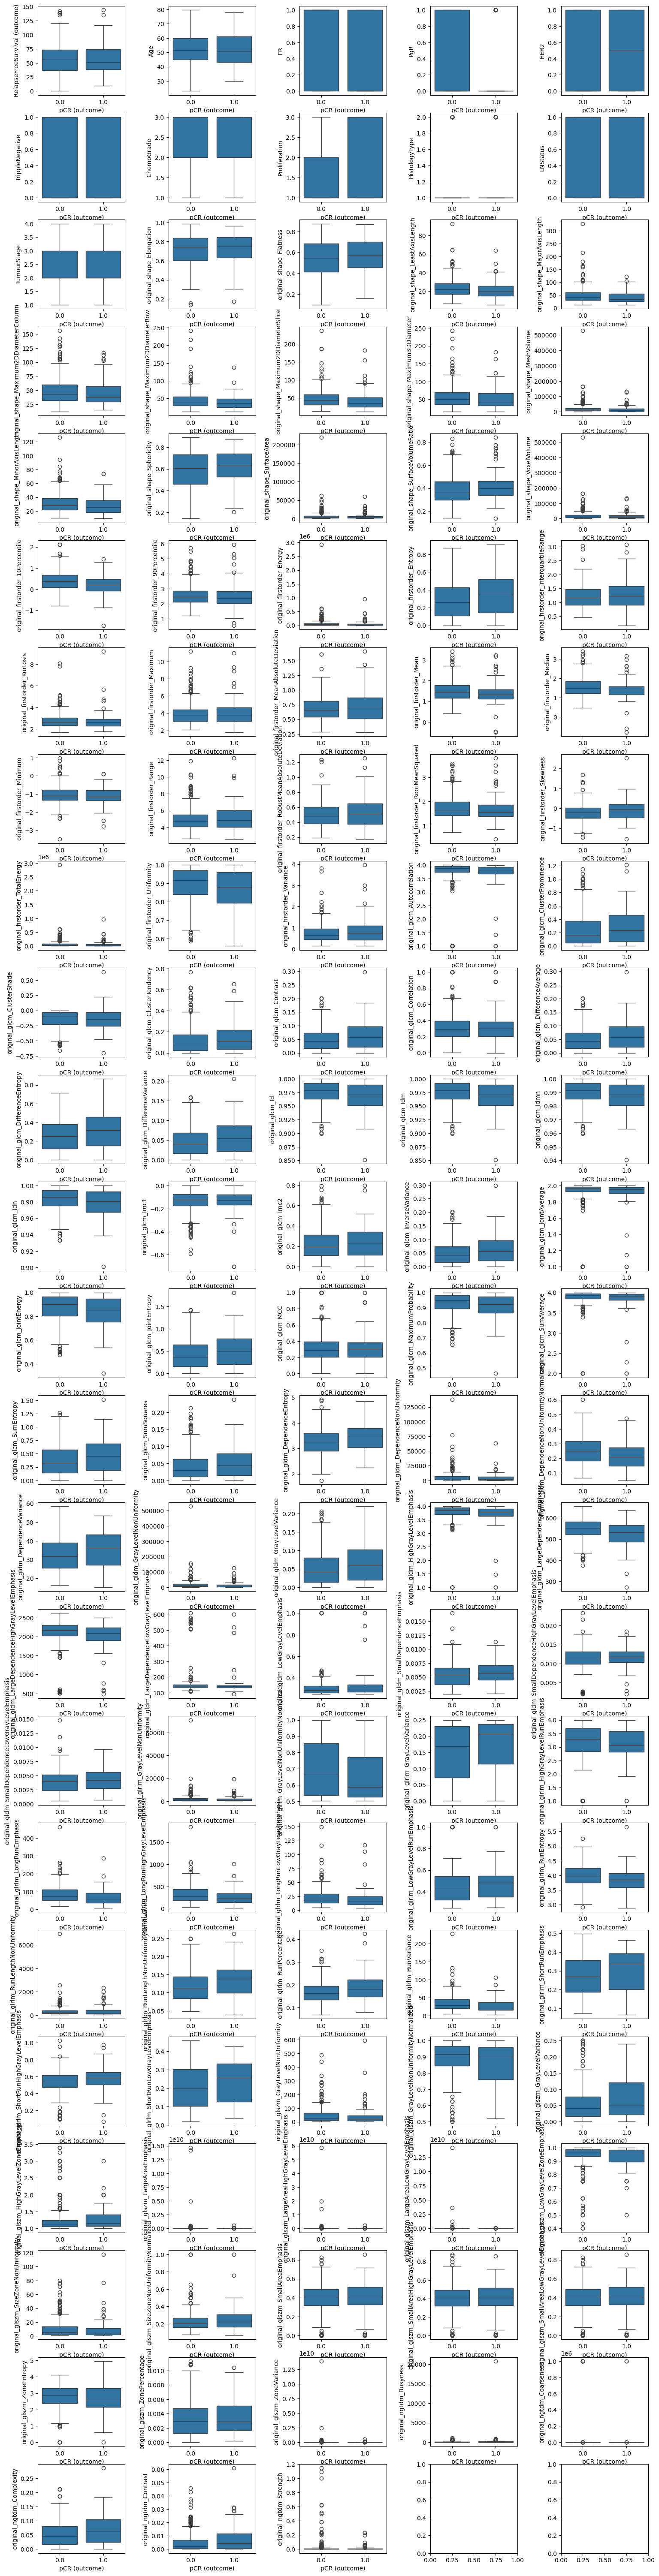

In [176]:
fig, axes = plt.subplots(nrows=24, ncols=5, figsize=(15,60))
plt.tight_layout()
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(all_df.columns[1:]):
    _= sns.boxplot(y=col, x='pCR (outcome)', data=all_df, ax=axes[i])

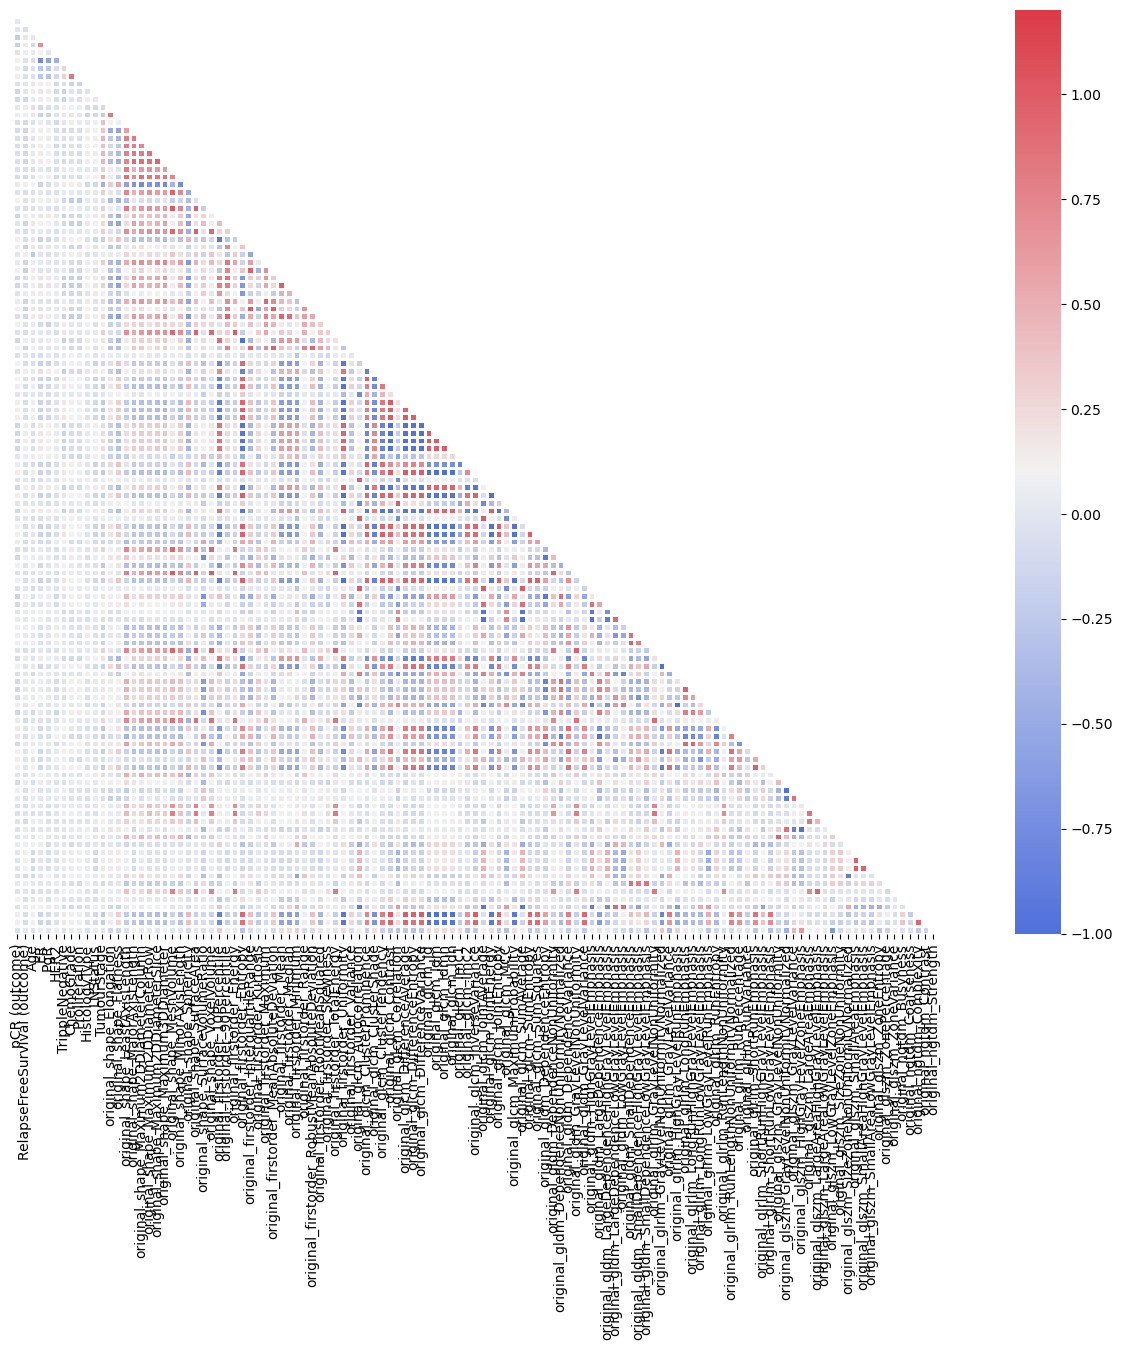

In [177]:
#PgR、Proliferation、HER2、original_glcm_ldn
corrMatt = all_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=True, cmap=cmap, mask=mask,
ax=ax, annot=False, fmt='.2g', linewidths=1,xticklabels=True,yticklabels=False);

In [178]:
#sns.pairplot(all_df[list(all_df.columns[1:11]) + ['pCR (outcome)']], hue="pCR (outcome)");

In [179]:
#sns.pairplot(all_df[list(all_df.columns[11:20]) + ['pCR (outcome)']], hue="pCR (outcome)");

<AxesSubplot:>

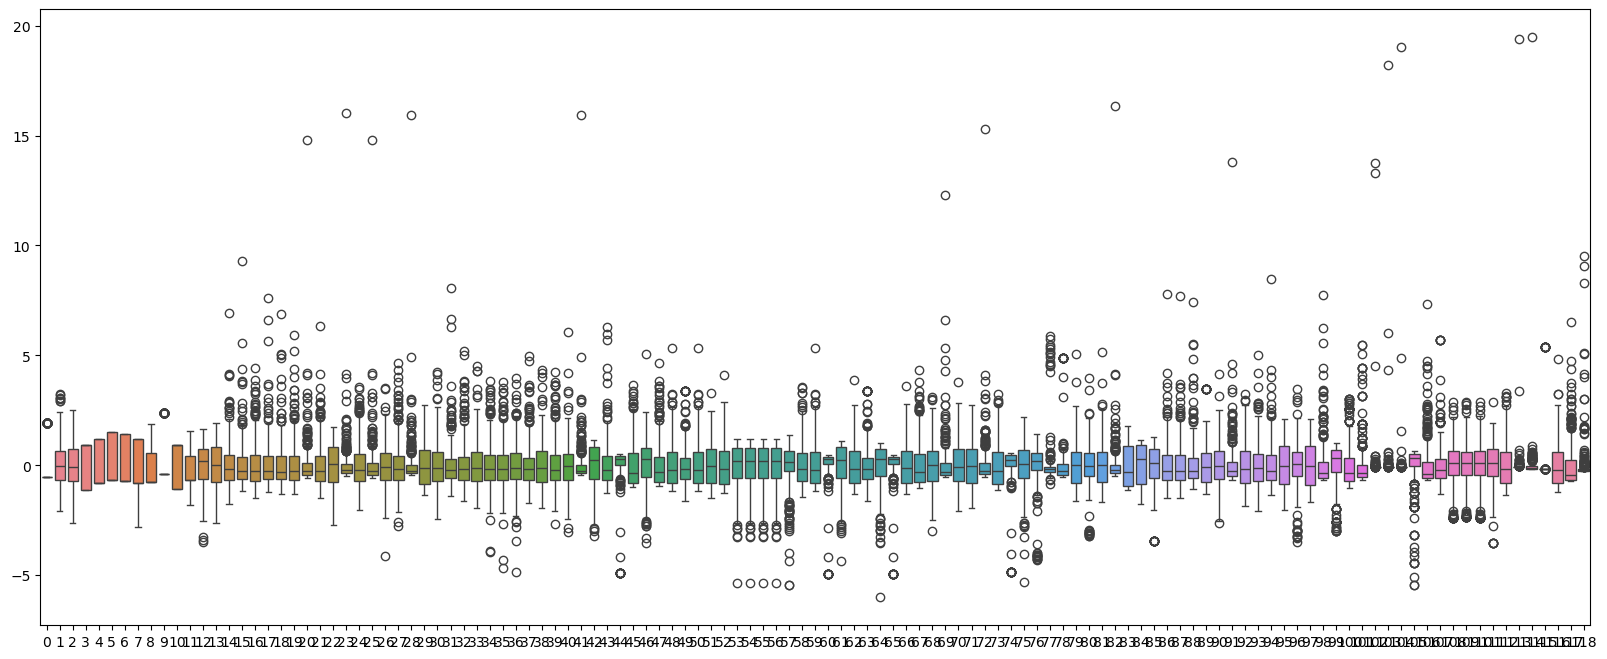

In [180]:
# Assign features to X
X = all_df.drop(columns=['pCR (outcome)', 'RelapseFreeSurvival (outcome)'])
# Normalise the features to use zero mean normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(all_df)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax) 

In [181]:
y = all_df['pCR (outcome)']
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3,
random_state=1, stratify=y)


In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(Xs_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [183]:
tree_clf.predict_proba(Xs_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [184]:
classifier_score = tree_clf.score(Xs_test, y_test)
print('The classifier accuracy score of Decision Tree is {:03.2f}'.format(classifier_score))

The classifier accuracy score of Decision Tree is 1.00


[Text(0.5, 0.75, 'x[0] <= 0.711\ngini = 0.33\nsamples = 273\nvalue = [216, 57]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 216\nvalue = [216, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 57\nvalue = [0, 57]')]

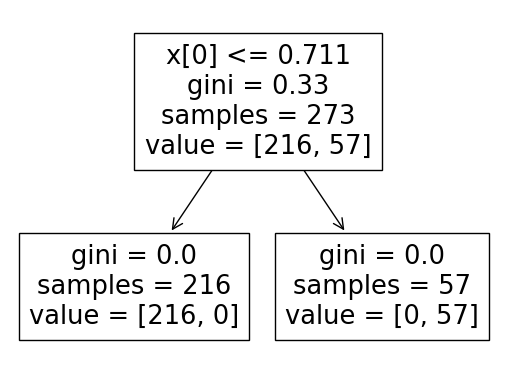

In [185]:
tree.plot_tree(tree_clf)

In [186]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(Xs_train, y_train)
classifier_score = gnb_clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 1.00


In [187]:
#kfold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold
n_folds = 5
clf_cv = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
scores = cross_val_score(clf_cv, Xs, y, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

[0.94871795 0.97435897 0.96153846 0.97435897 0.97435897]
Average score and standard deviation: (96.67 +- 0.459)%
